In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [3]:
header=["type","message"]
df=pd.read_csv("spam.csv",names=header)

In [4]:
import seaborn as sns

In [5]:
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df["type"].value_counts()

ham     4827
spam     747
Name: type, dtype: int64

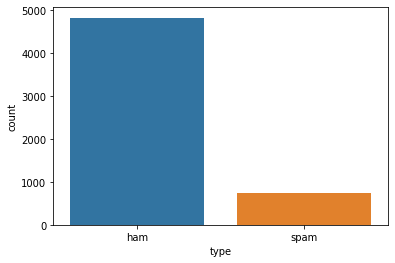

In [7]:
sns.countplot(x="type",data=df)

In [8]:
from wordcloud import WordCloud, STOPWORDS

In [9]:
#! pip install wordcloud

In [10]:
df1=df.loc[df["type"]=="spam"]

In [11]:
df1.head()

,type,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [12]:
#WORDCLOUD FOR SPAM
words = ' '.join(df1['message'])



In [13]:
cleaned=" ".join([word for word in words.split()
                 if "http" not in word 
                 and not word.startswith("&")])

In [14]:
cloud=WordCloud(stopwords = STOPWORDS,
               background_color="black",
                width=1600,
                height=800
               ).generate(cleaned)

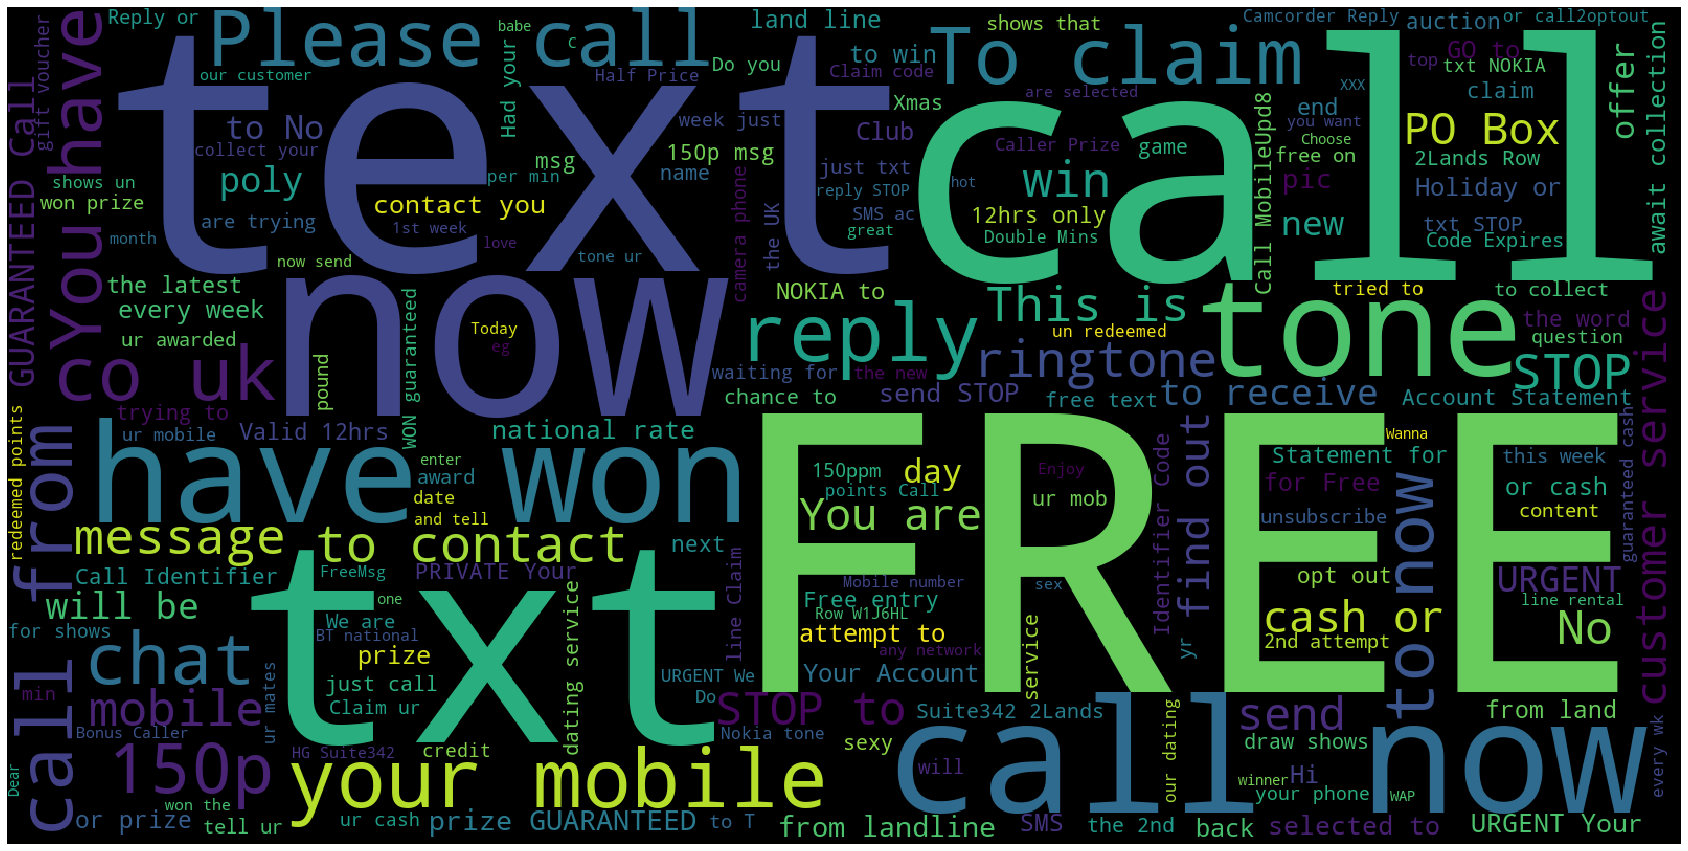

In [15]:
plt.figure(1,figsize=(30,20))
plt.imshow(cloud)
plt.axis('off')
plt.show()


In [16]:
#WORD CLOUD FOR HAM

In [17]:
df2=df.loc[df["type"]=="ham"]

In [18]:
df2.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [19]:
wrd=" ".join(df2["message"])
print(wrd[:2000])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today. I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i'm watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thats the way u feel. Thats the way its gota 

In [20]:
clean = " ".join([wrd for wrd in wrd.split()
                 if "u" not in wrd
                 and "k" not in wrd
                 and "lt" not in wrd
                 and "I" not in wrd])

In [21]:
cloud_pos=WordCloud(stopwords = STOPWORDS,
               background_color="black",
                width=1600,
                height=800
               ).generate(clean)

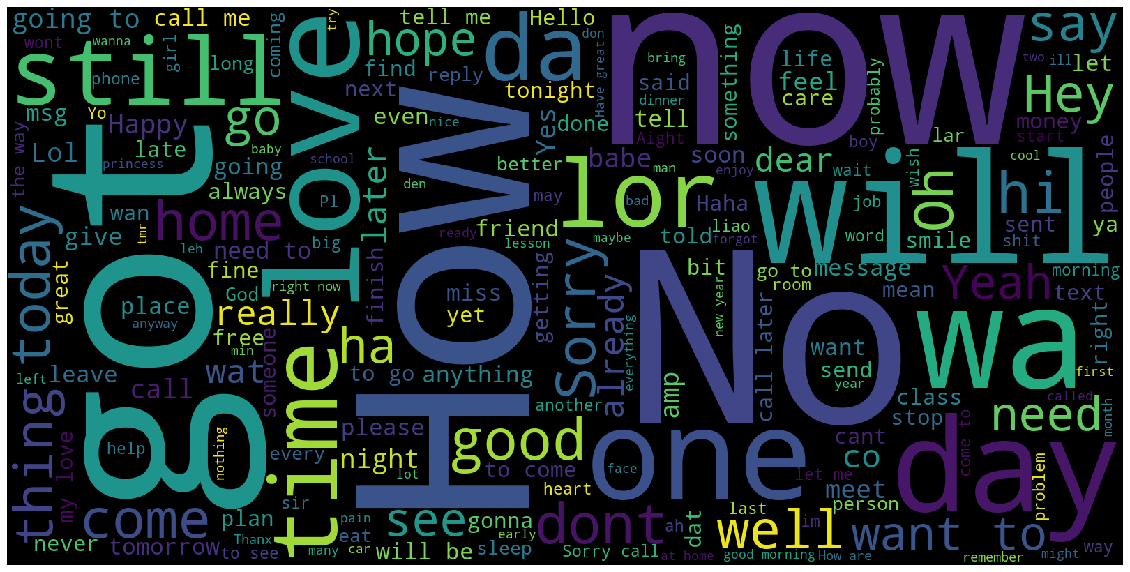

In [22]:
plt.figure(2,figsize = (20,30))
plt.imshow(cloud_pos)
plt.axis('off')
plt.show()


In [23]:
import re
import nltk
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


- cleaning data to remove special character, numbers 
- identifying root words

In [24]:
lemmatizer=WordNetLemmatizer()

In [25]:
clean_data=[]
clean_data_len=[]
def preprocess(raw_message):
    letter=re.sub("[^a-zA-Z]"," ",raw_message)
    
    letter=letter.lower()
    
    words=letter.split()
    
    words= [w for w in words if not w in stopwords.words("english")]
    
    words= [lemmatizer.lemmatize(word) for word in words]
    
    clean_data.append(" ".join(words))

In [26]:
clean_data=[]
clean_data_len=[]

df['message'].apply(lambda x: preprocess(x))
df['clean_data'] = clean_data

#df['clean_data_len'] = clean_data_len

In [27]:
df.head()

,type,message,clean_data
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [28]:
#converting type to numerical column
df["message_type"]=df["type"].apply(lambda x: 0 if x=="ham" else 1 )

In [29]:
df.head()

,type,message,clean_data,message_type
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train,test=train_test_split(df,test_size=0.2,random_state=101)

In [32]:
train_message=[]
for message in train["clean_data"]:
    train_message.append(message)

In [33]:
test_message=[]
for message in test["clean_data"]:
    test_message.append(message)

In [34]:
#initialzing bag of words
from sklearn.feature_extraction.text import CountVectorizer


vector=CountVectorizer()


train_fea=vector.fit_transform(train_message)


test_fea=vector.transform(test_message)

In [35]:
vector.vocabulary_

{'wait': 5912,
 'lor': 3117,
 'need': 3569,
 'feel': 1871,
 'bad': 420,
 'lar': 2954,
 'wat': 5951,
 'make': 3214,
 'people': 3949,
 'dearer': 1302,
 'de': 1296,
 'happiness': 2354,
 'dat': 1283,
 'meet': 3300,
 'pain': 3864,
 'miss': 3377,
 'dem': 1348,
 'fr': 2026,
 'ndship': 3557,
 'like': 3039,
 'needle': 3573,
 'clock': 994,
 'though': 5489,
 'nt': 3683,
 'able': 15,
 'met': 3334,
 'evn': 1751,
 'itz': 2733,
 'second': 4710,
 'bt': 721,
 'alwys': 172,
 'stay': 5145,
 'conected': 1093,
 'gud': 2290,
 'great': 2258,
 'run': 4596,
 'ttyl': 5667,
 'tell': 5399,
 'female': 1878,
 'throwing': 5501,
 'deciding': 1312,
 'get': 2152,
 'home': 2468,
 'work': 6119,
 'meh': 3304,
 'doc': 1478,
 'appointment': 264,
 'next': 3606,
 'week': 5989,
 'tired': 5529,
 'shoving': 4845,
 'stuff': 5219,
 'ugh': 5709,
 'normal': 3659,
 'body': 617,
 'babe': 410,
 'answering': 222,
 'see': 4718,
 'maybe': 3281,
 'better': 539,
 'reboot': 4386,
 'ym': 6230,
 'got': 2226,
 'photo': 3995,
 'come': 1048,
 'no

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_reg=LogisticRegression()

In [38]:
dense_train=train_fea.toarray()

dense_test=test_fea.toarray()

In [39]:
fit = log_reg.fit(dense_train,train['message_type'])

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
pred = fit.predict(dense_test)
accuracy = accuracy_score(pred,test['message_type'])

In [42]:
print("Accuracy of data : "+str(accuracy))

Accuracy of data : 0.9811659192825112


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
d_t=DecisionTreeClassifier()

In [45]:
dt=d_t.fit(dense_train,train["message_type"])

In [46]:
pred1=dt.predict(dense_test)

In [47]:
print("Accuracy Score using dt :  "+str(accuracy_score(pred1,test["message_type"])))

Accuracy Score using dt :  0.9775784753363229


# SERIALIZATION OF DATA USING PICKLE

In [48]:
logistic=LogisticRegression()

In [49]:
logistic.fit(dense_train,train["message_type"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
from pickle import dump

In [51]:
dump(vector,open("pickle/vectorcount.pkl","wb"))

dump(logistic,open("pickle/logistic_model.pkl","wb"))

In [52]:
#analysis of future data

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [54]:
from pickle import load

In [55]:
def preprocess(raw_message):
    
    letter=re.sub("[^a-zA-Z]"," ",raw_message)
    
    letter=letter.lower()
    
    words=letter.split()
    
    words= [w for w in words if not w in stopwords.words("english")]
    
    words= [lemmatizer.lemmatize(word) for word in words]
    
    clean_data = " ".join(words)
    
    return clean_data

In [56]:
def pred(message):
    
    vector=load(open("pickle/vectorcount.pkl","rb"))
    
    log= load(open("pickle/logistic_model.pkl","rb"))
    
    message_clean=preprocess(message)
    
    message_clean= vector.transform([message_clean])
    
    message_input=message_clean.toarray()
    
    prediction= log.predict(message_input)
    
    if prediction==1:
        print(" SPAM !!!! ")
    else:
        print(" HAM :) ")

In [57]:
sms =input("enter message : ")
pred(sms)


enter message : hi,how are you
 HAM :) 


In [60]:
sms =input("enter message : ")
pred(sms)

enter message : to claim free gift call
 SPAM !!!! 
